# Data processing for vineyard

**Vineyard index scales**

| Índices                             | Clases            | Rango de valores | Clases ID         |
|-------------------------------------|-------------------|------------------|-------------------|
|**Índice Huglin o Heliotérmico (HI)**| Muy cálido        | HI > 3000        | HI+3              |
|                                     | Cálido            | 2400 < HI ≤ 3000 | HI+2              |
|                                     | Templado cálido   | 2100 < HI ≤ 2400 | HI+1              |
|                                     | Templado          | 1800 < HI ≤ 2100 | HI-1              |
|                                     | Fresco            | 1500 < HI ≤ 1800 | HI-2              |
|                                     | Muy Fresco        | HI ≤ 1500        | HI-3              |
|                                     |                   |                  |                   |                   
|**Índice de Frescor Nocturno(CI)**   | Muy fresco        | CI ≤ 12          | CI+2              |
|                                     | Fresco            | 12 < CI ≤ 14     | CI+1              |
|                                     | Templado          | 14 < CI ≤ 18     | CI-1              |
|                                     | Cálido            | CI > 18          | CI-2              |
|                                     |                   |                  |                   |
|**Índice de Sequía (DI)**            | Muy seco          | DI ≤-200         | DI+3              |
|                                     | Seco              | -200 < DI ≤ -100 | DI+2              |
|                                     | Moderadamente seco| -100 < DI ≤ 50   | DI+1              |
|                                     | Sub húmedo        | 50 < DI ≤150     | DI-1              |
|                                     | Húmedo            | DI > 150         | DI-2              |

**ZONA DE ALTO POTENCIAL VITÍCOLA:**
- **Índice de Huglin**: clases de clima muy fresco (HI-3), fresco (HI-2), templado (HI-1) y clase de clima templado cálido (HI+1).
- **Índice de Frescor Nocturno**: clases de clima con noches frescas (CI+1) y muy frescas (CI+2).
- **Índice de Sequía**: clases de clima sub-húmedo (DI-1) y moderadamente seco (DI+1).

**scenarios' equivalences**

RCPs and SSPs, resulting in four suggestions of suitable combinations, mapping: 
- (i) A2 world onto RCP 8.5 and SSP3
- (ii) B2 (or A1B) world onto RCP 6.0 and SSP2
- (iii) B1 world onto RCP 4.5 and SSP1
- (iv) A1FI world onto RCP 8.5 and SSP5

# Setup
## Library import
We import all the required Python libraries

In [2]:
import fiona
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import box
from tqdm import tqdm

# Data import

In [3]:
## Spain
spain = gpd.read_file('../../datasets/processed/gadm36_ESP_0.json', driver='GeoJSON')

<AxesSubplot:>

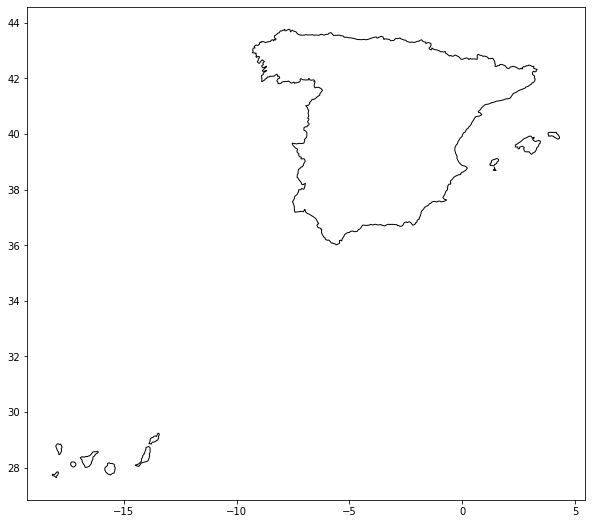

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
spain.plot(ax=ax, color='w', edgecolor='k')

<AxesSubplot:>

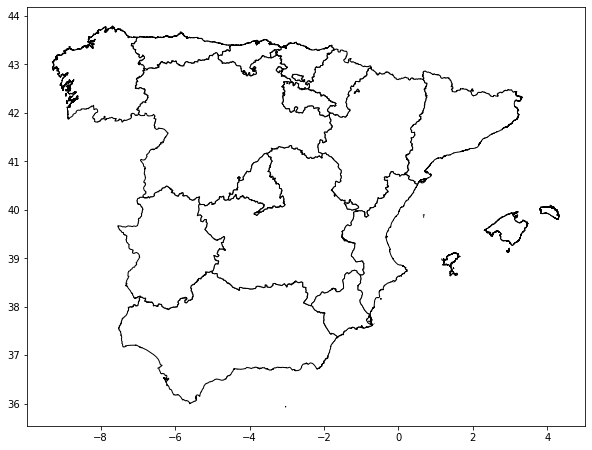

In [6]:
## Comunidades
comunidades = gpd.read_file('../../datasets/processed/comunidades.geojson', driver='GeoJSON')

fig, ax = plt.subplots(figsize=(10,10))
comunidades.plot(ax=ax, color='w', edgecolor='k')

## Frescor Nocturno 
**Read data**

In [7]:
layerlist = fiona.listlayers('../../datasets/raw/crops/vino/Resumen FRESCOR.dbf')
layerlist

['Resumen FRESCOR']

In [8]:
df_frescor = gpd.read_file('../../datasets/raw/crops/vino/Resumen FRESCOR.dbf', driver="FileDBF", layer=layerlist[0])
df_frescor = df_frescor[['DENOMINACI', 'LONG', 'LAT', 'ALTURA', 'N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1', 'geometry']]
df_frescor = df_frescor.reset_index().rename(columns={'index': 'grid_id'})
df_frescor

,grid_id,DENOMINACI,LONG,LAT,ALTURA,N1971_2000,MEDIA,A1B,A2,B1,geometry
0,0,1.0,-5.6,36.0,228.93,19.00,20.26,20.37,20.10,20.14,None
1,1,2.0,-5.4,36.0,143.71,18.92,20.15,20.26,19.99,20.03,None
2,2,3.0,-6.0,36.2,62.26,19.95,21.31,21.44,21.09,21.17,None
3,3,4.0,-5.8,36.2,75.97,19.14,20.48,20.60,20.26,20.35,None
4,4,5.0,-5.6,36.2,270.90,18.01,19.26,19.38,19.08,19.11,None
...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,1441.0,-5.4,43.6,114.55,14.62,15.97,16.10,15.94,15.73,None
1441,1441,1442.0,-5.2,43.6,41.89,14.75,16.14,16.29,16.06,15.86,None
1442,1442,1443.0,-8.0,43.8,275.28,12.96,14.08,14.20,14.01,13.86,None
1443,1443,1444.0,-7.8,43.8,88.86,12.78,13.89,14.01,13.81,13.68,None


In [9]:
df_frescor = pd.read_excel('../../datasets/raw/crops/vino/Resumen FRESCOR corregido.xlsx', sheet_name=layerlist[0])
df_frescor = df_frescor[['DENOMINACI', 'LONG', 'LAT', 'ALTURA', 'N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']]
df_frescor['geomatry'] = None
df_frescor = df_frescor.reset_index().rename(columns={'index': 'grid_id'})
df_frescor

,grid_id,DENOMINACI,LONG,LAT,ALTURA,N1971_2000,MEDIA,A1B,A2,B1,geomatry
0,0,1,-5.6,36.0,228.93,19.00,20.26,20.10,20.37,20.14,None
1,1,2,-5.4,36.0,143.71,18.92,20.15,19.99,20.26,20.03,None
2,2,3,-6.0,36.2,62.26,19.95,21.31,21.09,21.44,21.17,None
3,3,4,-5.8,36.2,75.97,19.14,20.48,20.26,20.60,20.35,None
4,4,5,-5.6,36.2,270.90,18.01,19.26,19.08,19.38,19.11,None
...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,1441,-5.4,43.6,114.55,14.62,15.97,15.94,16.10,15.73,None
1441,1441,1442,-5.2,43.6,41.89,14.75,16.14,16.06,16.29,15.86,None
1442,1442,1443,-8.0,43.8,275.28,12.96,14.08,14.01,14.20,13.86,None
1443,1443,1444,-7.8,43.8,88.86,12.78,13.89,13.81,14.01,13.68,None


**Create grid**

In [10]:
gdf_frescor = gpd.GeoDataFrame(df_frescor, geometry=gpd.points_from_xy(df_frescor.LONG, df_frescor.LAT))
gdf_frescor = gdf_frescor.set_crs("EPSG:4326")

In [11]:
# total area for the grid
xmin, ymin, xmax, ymax= gdf_frescor.total_bounds
# how many cells across and down
n_cells=gdf_frescor['LONG'].nunique()
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "EPSG:4326"#"+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(box(x0+cell_size*0.5, y0-cell_size*0.5, x1+cell_size*0.5, y1-cell_size*0.5)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=crs)

<AxesSubplot:>

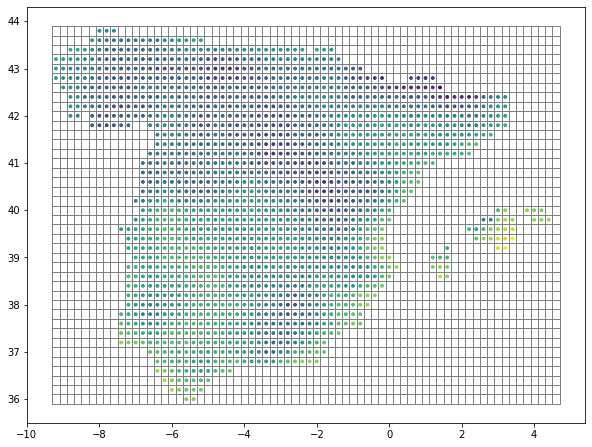

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
gdf_frescor.plot(ax=ax, column='MEDIA', markersize=8)

**Intersect points with grid**

In [13]:
polygons = []
sindex = cell.sindex
# Iterate over the geometries
for n, geometry in enumerate(tqdm(gdf_frescor.geometry)):

    # Find approximate matches with r-tree
    possible_matches_index = list(sindex.intersection(geometry.bounds))
    possible_matches = cell.iloc[possible_matches_index]
    # Find precise matches with r-tree
    polygons.append(possible_matches[possible_matches.intersects(geometry)]['geometry'].iloc[0])

100%|██████████| 1445/1445 [00:01<00:00, 1083.42it/s]


In [14]:
gdf_frescor['geometry'] = polygons

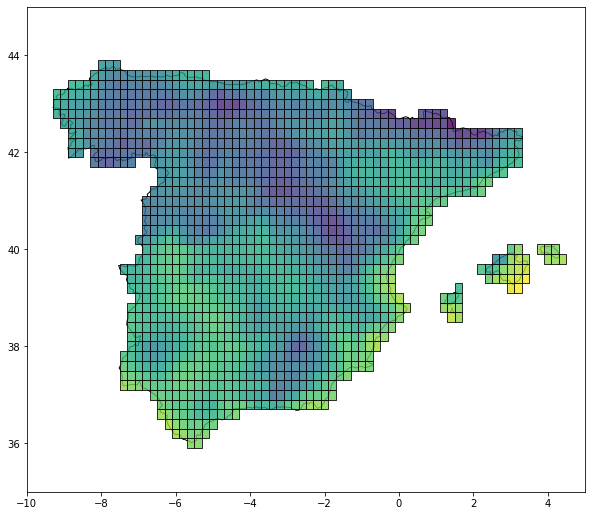

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
spain.plot(ax=ax, color='w', edgecolor='k')
gdf_frescor.plot(ax=ax, column='MEDIA', alpha=0.8, edgecolor='k')
ax.set_ylim([35,45]);
ax.set_xlim([-10,5]);

**Intersect grid with spain**

In [16]:
gdf_frescor = gdf_frescor.overlay(gpd.GeoDataFrame({'geometry':spain.simplify(0.00005)}), how='intersection')

<AxesSubplot:>

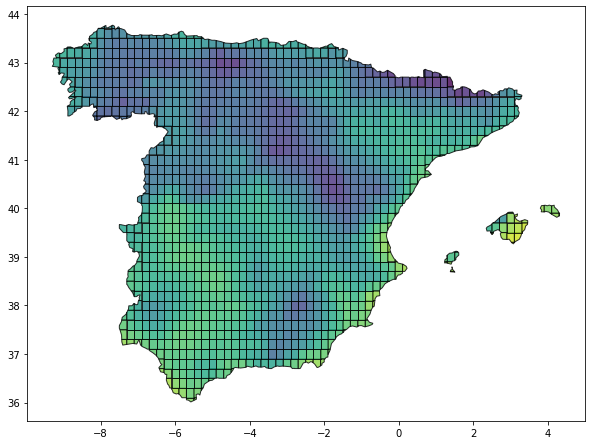

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_frescor.plot(ax=ax, column='MEDIA', alpha=0.8, edgecolor='k')

**Save grid as GeoJSON**

In [18]:
gdf_grid = gdf_frescor[['grid_id', 'DENOMINACI', 'LONG', 'LAT', 'geometry']]

In [298]:
gdf_grid.to_file('../../datasets/processed/rejilla_viñedos.geojson', driver='GeoJSON')  

<AxesSubplot:>

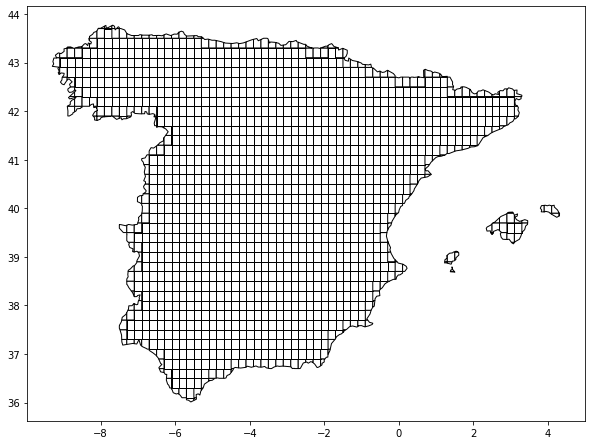

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_grid.plot(ax=ax, color='w', edgecolor='k')

### Add index classes

| Índices                             | Clases            | Rango de valores | Clases ID         |
|-------------------------------------|-------------------|------------------|-------------------|                 
|**Índice de Frescor Nocturno(CI)**   | Muy fresco        | CI ≤ 12          | CI+2              |
|                                     | Fresco            | 12 < CI ≤ 14     | CI+1              |
|                                     | Templado          | 14 < CI ≤ 18     | CI-1              |
|                                     | Cálido            | CI > 18          | CI-2              |

In [20]:
def CI_index_classes(x):
    if x <= 12:
        return 'CI+2'
    if (x > 12) and (x <= 14):
        return 'CI+1'
    if (x > 14) and (x <= 18):
        return 'CI-1'
    if x > 18:
        return 'CI-2'

In [21]:
def clases(x):
    if x <= 12:
        return 'Muy fresco'
    if (x > 12) and (x <= 14):
        return 'Fresco'
    if (x > 14) and (x <= 18):
        return 'Templado'
    if x > 18:
        return 'Cálido'

In [22]:
for scenario in ['N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']:
    print(scenario)
    gdf_frescor[f'{scenario}_class'] = gdf_frescor[scenario].apply(lambda x: CI_index_classes(x))
    gdf_frescor[f'{scenario}_clase'] = gdf_frescor[scenario].apply(lambda x: clases(x))

N1971_2000
MEDIA
A1B
A2
B1


<AxesSubplot:>

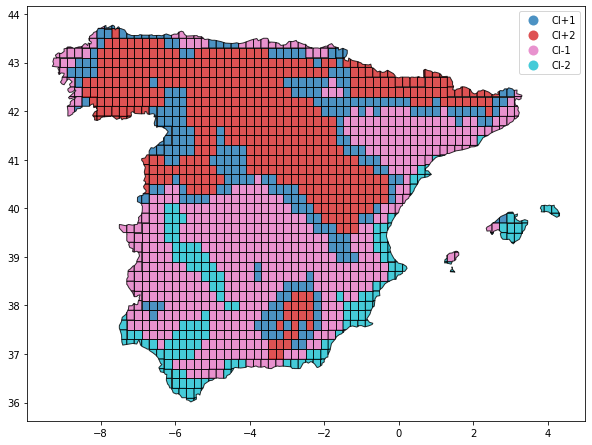

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_frescor.plot(ax=ax, column='MEDIA_class', alpha=0.8, edgecolor='k', legend=True)

## Huglin 
**Read data**

In [24]:
layerlist = fiona.listlayers('../../datasets/raw/crops/vino/Resumen Huglin.dbf')
layerlist

['Resumen Huglin']

In [25]:
df_huglin = gpd.read_file('../../datasets/raw/crops/vino/Resumen Huglin.dbf', driver="FileDBF", layer=layerlist[0])
df_huglin = df_huglin[['DENOMINACI', 'LONG', 'LAT', 'ALTURA', 'N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1', 'geometry']]
df_huglin = df_huglin.reset_index().rename(columns={'index': 'grid_id'})
df_huglin

,grid_id,DENOMINACI,LONG,LAT,ALTURA,N1971_2000,MEDIA,A1B,A2,B1,geometry
0,0,1.0,-5.6,36.0,228.93,2079.05,2306.05,2322.15,2211.63,2327.29,None
1,1,2.0,-5.4,36.0,143.71,2150.34,2376.45,2392.96,2286.38,2394.18,None
2,2,3.0,-6.0,36.2,62.26,2317.59,2565.03,2585.36,2458.09,2584.47,None
3,3,4.0,-5.8,36.2,75.97,2341.20,2586.96,2607.63,2480.11,2605.60,None
4,4,5.0,-5.6,36.2,270.90,2166.85,2397.34,2419.70,2293.55,2410.43,None
...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,1441.0,-5.4,43.6,114.55,1482.62,1693.18,1698.11,1645.05,1711.21,None
1441,1441,1442.0,-5.2,43.6,41.89,1595.80,1802.61,1807.50,1757.12,1819.15,None
1442,1442,1443.0,-8.0,43.8,275.28,1237.81,1404.75,1409.99,1369.06,1414.63,None
1443,1443,1444.0,-7.8,43.8,88.86,1434.68,1604.90,1611.24,1564.11,1615.43,None


In [26]:
df_huglin = pd.read_excel('../../datasets/raw/crops/vino/Resumen Huglin corregido.xlsx', sheet_name = layerlist[0])
df_huglin = df_huglin[['DENOMINACI', 'LONG', 'LAT', 'ALTURA', 'N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']]
df_huglin['geometry'] = None
df_huglin = df_huglin.reset_index().rename(columns={'index': 'grid_id'})
df_huglin

,grid_id,DENOMINACI,LONG,LAT,ALTURA,N1971_2000,MEDIA,A1B,A2,B1,geometry
0,0,1,-5.6,36.0,228.93,2079.05,2306.05,2327.29,2322.15,2211.63,None
1,1,2,-5.4,36.0,143.71,2150.34,2376.45,2394.18,2392.96,2286.38,None
2,2,3,-6.0,36.2,62.26,2317.59,2565.03,2584.47,2585.36,2458.09,None
3,3,4,-5.8,36.2,75.97,2341.20,2586.96,2605.60,2607.63,2480.11,None
4,4,5,-5.6,36.2,270.90,2166.85,2397.34,2410.43,2419.70,2293.55,None
...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,1441,-5.4,43.6,114.55,1482.62,1693.18,1711.21,1698.11,1645.05,None
1441,1441,1442,-5.2,43.6,41.89,1595.80,1802.61,1819.15,1807.50,1757.12,None
1442,1442,1443,-8.0,43.8,275.28,1237.81,1404.75,1414.63,1409.99,1369.06,None
1443,1443,1444,-7.8,43.8,88.86,1434.68,1604.90,1615.43,1611.24,1564.11,None


**Create grid**

In [27]:
gdf_huglin = gpd.GeoDataFrame(df_huglin, geometry=gpd.points_from_xy(df_huglin.LONG, df_huglin.LAT))
gdf_huglin = gdf_huglin.set_crs("EPSG:4326")

In [28]:
gdf_huglin['geometry'] = polygons

<AxesSubplot:>

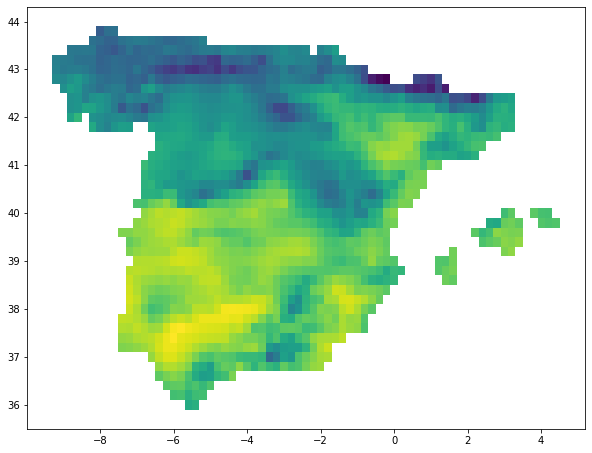

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_huglin.plot(ax=ax, column='MEDIA')

**Intersect grid with spain**

In [30]:
gdf_huglin = gdf_huglin.overlay(gpd.GeoDataFrame({'geometry':spain.simplify(0.005)}), how='intersection')

<AxesSubplot:>

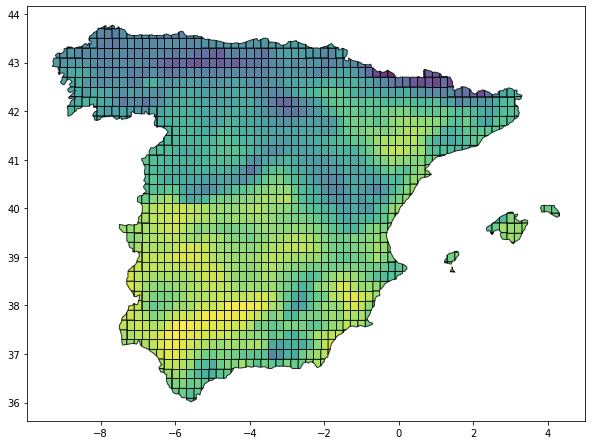

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_huglin.plot(ax=ax, column='MEDIA', alpha=0.8, edgecolor='k')

### Add index classes

| Índices                             | Clases            | Rango de valores | Clases ID         |
|-------------------------------------|-------------------|------------------|-------------------|
|**Índice Huglin o Heliotérmico (HI)**| Muy cálido        | HI > 3000        | HI+3              |
|                                     | Cálido            | 2400 < HI ≤ 3000 | HI+2              |
|                                     | Templado cálido   | 2100 < HI ≤ 2400 | HI+1              |
|                                     | Templado          | 1800 < HI ≤ 2100 | HI-1              |
|                                     | Fresco            | 1500 < HI ≤ 1800 | HI-2              |
|                                     | Muy Fresco        | HI ≤ 1500        | HI-3              |

In [32]:
def HI_index_classes(x):
    if x > 3000:
        return 'HI+3'
    if (x > 2400) and (x <= 3000):
        return 'HI+2'
    if (x > 2100) and (x <= 2400):
        return 'HI+1'
    if (x > 1800) and (x <= 2100):
        return 'HI-1'
    if (x > 1500) and (x <= 1800):
        return 'HI-2'
    if x <= 1500:
        return 'HI-3'

In [33]:
def clases(x):
    if x > 3000:
        return 'Muy cálido'
    if (x > 2400) and (x <= 3000):
        return 'Cálido'
    if (x > 2100) and (x <= 2400):
        return 'Templado cálido'
    if (x > 1800) and (x <= 2100):
        return 'Templado'
    if (x > 1500) and (x <= 1800):
        return 'Fresco'
    if x <= 1500:
        return 'Muy Fresco '

In [34]:
for scenario in ['N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']:
    print(scenario)
    gdf_huglin[f'{scenario}_class'] = gdf_huglin[scenario].apply(lambda x: HI_index_classes(x))
    gdf_huglin[f'{scenario}_clase'] = gdf_huglin[scenario].apply(lambda x: clases(x))

N1971_2000
MEDIA
A1B
A2
B1


<AxesSubplot:>

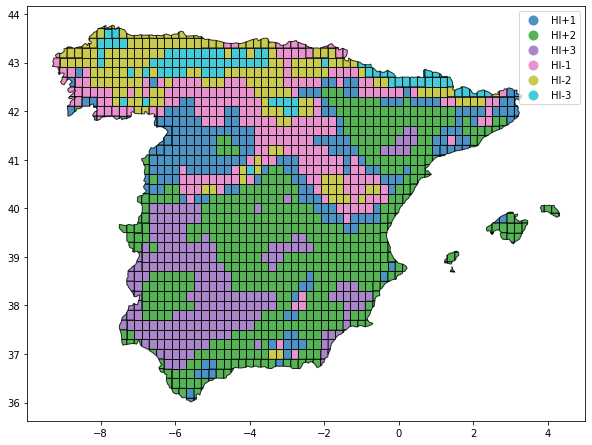

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_huglin.plot(ax=ax, column='MEDIA_class', alpha=0.8, edgecolor='k', legend=True)

## Sequía
**Read data**

In [36]:
layerlist = fiona.listlayers('../../datasets/raw/crops/vino/Resumen IS.dbf')
layerlist

['Resumen IS']

In [37]:
df_is = gpd.read_file('../../datasets/raw/crops/vino/Resumen IS.dbf', driver="FileDBF", layer=layerlist[0])
df_is = df_is[['DENOMINACI', 'LONG', 'LAT', 'ALTURA', 'N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1', 'geometry']]
df_is = df_is.reset_index().rename(columns={'index': 'grid_id'})
df_is

,grid_id,DENOMINACI,LONG,LAT,ALTURA,N1971_2000,MEDIA,A1B,A2,B1,geometry
0,0,1.0,-5.6,36.0,228.93,47.67,20.20,12.39,30.17,31.40,None
1,1,2.0,-5.4,36.0,143.71,47.32,2.60,-5.18,9.81,15.39,None
2,2,3.0,-6.0,36.2,62.26,44.07,4.21,-4.62,17.79,15.49,None
3,3,4.0,-5.8,36.2,75.97,28.97,-16.17,-24.62,-1.73,-6.22,None
4,4,5.0,-5.6,36.2,270.90,51.98,0.90,-8.46,14.43,13.37,None
...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,1441.0,-5.4,43.6,114.55,257.09,196.37,192.64,211.83,195.27,None
1441,1441,1442.0,-5.2,43.6,41.89,255.20,192.25,187.25,211.48,191.73,None
1442,1442,1443.0,-8.0,43.8,275.28,350.15,289.40,287.32,295.82,290.13,None
1443,1443,1444.0,-7.8,43.8,88.86,260.76,198.40,195.89,204.78,200.10,None


In [38]:
df_is = pd.read_excel('../../datasets/raw/crops/vino/Resumen IS corregido.xlsx', sheet_name=layerlist[0])
df_is = df_is[['DENOMINACI', 'LONG', 'LAT', 'ALTURA', 'N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']]
df_is['geometry'] = None
df_is = df_is.reset_index().rename(columns={'index': 'grid_id'})
df_is = df_is.iloc[:-1]
df_is

,grid_id,DENOMINACI,LONG,LAT,ALTURA,N1971_2000,MEDIA,A1B,A2,B1,geometry
0,0,1.0,-5.6,36.0,228.93,47.67,20.20,31.40,12.39,30.17,None
1,1,2.0,-5.4,36.0,143.71,47.32,2.60,15.39,-5.18,9.81,None
2,2,3.0,-6.0,36.2,62.26,44.07,4.21,15.49,-4.62,17.79,None
3,3,4.0,-5.8,36.2,75.97,28.97,-16.17,-6.22,-24.62,-1.73,None
4,4,5.0,-5.6,36.2,270.90,51.98,0.90,13.37,-8.46,14.43,None
...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,1441.0,-5.4,43.6,114.55,257.09,196.37,195.27,192.64,211.83,None
1441,1441,1442.0,-5.2,43.6,41.89,255.20,192.25,191.73,187.25,211.48,None
1442,1442,1443.0,-8.0,43.8,275.28,350.15,289.40,290.13,287.32,295.82,None
1443,1443,1444.0,-7.8,43.8,88.86,260.76,198.40,200.10,195.89,204.78,None


**Create gridd**

In [39]:
gdf_is = gpd.GeoDataFrame(df_is, geometry=gpd.points_from_xy(df_is.LONG, df_is.LAT))
gdf_is = gdf_is.set_crs("EPSG:4326")

In [40]:
gdf_is['geometry'] = polygons

<AxesSubplot:>

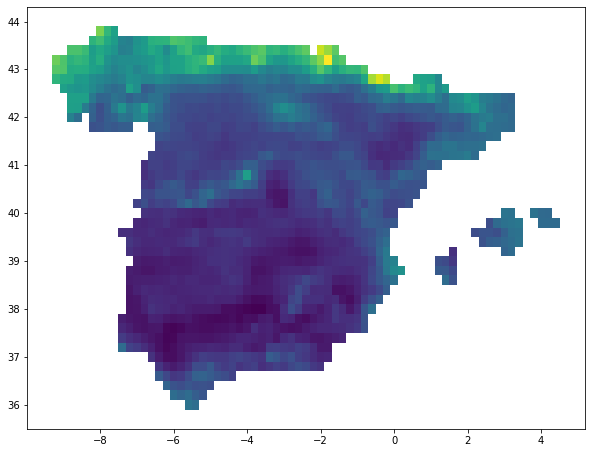

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_is.plot(ax=ax, column='MEDIA')

**Intersect grid with spain**

In [42]:
gdf_is = gdf_is.overlay(gpd.GeoDataFrame({'geometry':spain.simplify(0.005)}), how='intersection')

<AxesSubplot:>

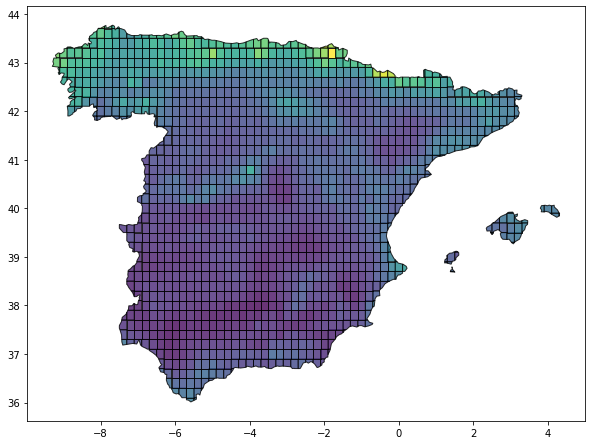

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_is.plot(ax=ax, column='MEDIA', alpha=0.8, edgecolor='k')

### Add index classes

| Índices                             | Clases            | Rango de valores | Clases ID         |
|-------------------------------------|-------------------|------------------|-------------------|
|**Índice de Sequía (DI)**            | Muy seco          | DI ≤-200         | DI+3              |
|                                     | Seco              | -200 < DI ≤ -100 | DI+2              |
|                                     | Moderadamente seco| -100 < DI ≤ 50   | DI+1              |
|                                     | Sub húmedo        | 50 < DI ≤150     | DI-1              |
|                                     | Húmedo            | DI > 150         | DI-2              |

In [44]:
def DI_index_classes(x):
    if x <= -200:
        return 'DI+3'
    if (x > -200) and (x <= -100):
        return 'DI+2'
    if (x > -100) and (x <= 50):
        return 'DI+1'
    if (x > 50) and (x <= 150):
        return 'DI-1'
    if x > 150:
        return 'DI-2'

In [45]:
def clases(x):
    if x <= -200:
        return 'Muy seco'
    if (x > -200) and (x <= -100):
        return 'Seco'
    if (x > -100) and (x <= 50):
        return 'Moderadamente seco'
    if (x > 50) and (x <= 150):
        return 'Sub húmedo'
    if x > 150:
        return 'Húmedo'

In [46]:
for scenario in ['N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']:
    print(scenario)
    gdf_is[f'{scenario}_class'] = gdf_is[scenario].apply(lambda x: DI_index_classes(x))
    gdf_is[f'{scenario}_clase'] = gdf_is[scenario].apply(lambda x: clases(x))

N1971_2000
MEDIA
A1B
A2
B1


<AxesSubplot:>

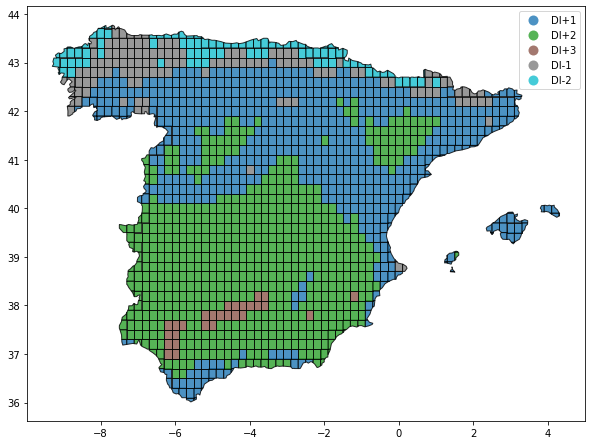

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_is.plot(ax=ax, column='MEDIA_class', alpha=0.8, edgecolor='k', legend=True)

## Mapa de zonificación

In [48]:
lst = list(gdf_is[['N1971_2000_class', 'MEDIA_class', 'A1B_class','A2_class', 'B1_class']].columns)
lst_z = [x.replace('class', 'class_z') for x in lst]

gdf_is_z = gdf_is[['LONG', 'LAT', 'N1971_2000_class', 'MEDIA_class', 'A1B_class','A2_class', 'B1_class']].rename(columns=dict(zip(lst,lst_z)))

In [49]:
gdf_is_z

,LONG,LAT,N1971_2000_class_z,MEDIA_class_z,A1B_class_z,A2_class_z,B1_class_z
0,-5.6,36.0,DI+1,DI+1,DI+1,DI+1,DI+1
1,-5.4,36.0,DI+1,DI+1,DI+1,DI+1,DI+1
2,-6.0,36.2,DI+1,DI+1,DI+1,DI+1,DI+1
3,-5.8,36.2,DI+1,DI+1,DI+1,DI+1,DI+1
4,-5.6,36.2,DI-1,DI+1,DI+1,DI+1,DI+1
...,...,...,...,...,...,...,...
1435,-5.4,43.6,DI-2,DI-2,DI-2,DI-2,DI-2
1436,-5.2,43.6,DI-2,DI-2,DI-2,DI-2,DI-2
1437,-8.0,43.8,DI-2,DI-2,DI-2,DI-2,DI-2
1438,-7.8,43.8,DI-2,DI-2,DI-2,DI-2,DI-2


In [50]:
gdf_zone = pd.merge(pd.merge(gdf_frescor[['grid_id', 'DENOMINACI', 'LONG', 'LAT', 'geometry', 'N1971_2000_class', 'MEDIA_class', 'A1B_class',
           'A2_class', 'B1_class']], gdf_huglin[['LONG', 'LAT', 'N1971_2000_class', 'MEDIA_class', 'A1B_class',
           'A2_class', 'B1_class']], how='left', on=['LONG', 'LAT']),\
             gdf_is_z[['LONG', 'LAT', 'N1971_2000_class_z', 'MEDIA_class_z', 'A1B_class_z',
           'A2_class_z', 'B1_class_z']], how='left', on=['LONG', 'LAT'])

In [51]:
lst = list(gdf_zone.columns)
lst_new = [x.replace('class_x', 'class_CI') for x in lst]
lst_new = [x.replace('class_y', 'class_HI') for x in lst_new]
lst_new = [x.replace('class_z', 'class_DI') for x in lst_new]

In [52]:
gdf_zone = gdf_zone.rename(columns=dict(zip(lst,lst_new)))

In [53]:
gdf_zone.head()

,grid_id,DENOMINACI,LONG,LAT,geometry,N1971_2000_class_CI,MEDIA_class_CI,A1B_class_CI,A2_class_CI,B1_class_CI,N1971_2000_class_HI,MEDIA_class_HI,A1B_class_HI,A2_class_HI,B1_class_HI,N1971_2000_class_DI,MEDIA_class_DI,A1B_class_DI,A2_class_DI,B1_class_DI
0,0,1,-5.6,36.0,"POLYGON ((-5.70000 36.10000, -5.50000 36.10000...",CI-2,CI-2,CI-2,CI-2,CI-2,HI-1,HI+1,HI+1,HI+1,HI+1,DI+1,DI+1,DI+1,DI+1,DI+1
1,1,2,-5.4,36.0,"POLYGON ((-5.50000 36.10000, -5.43392 36.10000...",CI-2,CI-2,CI-2,CI-2,CI-2,HI+1,HI+1,HI+1,HI+1,HI+1,DI+1,DI+1,DI+1,DI+1,DI+1
2,2,3,-6.0,36.2,"POLYGON ((-6.10000 36.30000, -5.90000 36.30000...",CI-2,CI-2,CI-2,CI-2,CI-2,HI+1,HI+2,HI+2,HI+2,HI+2,DI+1,DI+1,DI+1,DI+1,DI+1
3,3,4,-5.8,36.2,"POLYGON ((-5.90000 36.30000, -5.70000 36.30000...",CI-2,CI-2,CI-2,CI-2,CI-2,HI+1,HI+2,HI+2,HI+2,HI+2,DI+1,DI+1,DI+1,DI+1,DI+1
4,4,5,-5.6,36.2,"POLYGON ((-5.70000 36.30000, -5.50000 36.30000...",CI-2,CI-2,CI-2,CI-2,CI-2,HI+1,HI+1,HI+2,HI+2,HI+1,DI-1,DI+1,DI+1,DI+1,DI+1


In [54]:
def combine_indexes_class(x, scenario):
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-3'):
        return 'DI-1, CI+2, HI-3'
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 'DI-1, CI+2, HI-2'
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-3'):
        return 'DI-1, CI+1, HI-3'
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 'DI-1, CI+1, HI-2'
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-1'):
        return 'DI-1, CI+1, HI-1'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-3'):
        return 'DI+1, CI+2, HI-3'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 'DI+1, CI+2, HI-2'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-1'):
        return 'DI+1, CI+2, HI-1'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI+1'):
        return 'DI+1, CI+2, HI+1'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 'DI+1, CI+1, HI-2'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-1'):
        return 'DI+1, CI+1, HI-1'
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI+1'):
        return 'DI+1, CI+1, HI+1'
    return ''

In [55]:
def combine_indexes_value(x, scenario):
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-3'):
        return 1
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 2
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-3'):
        return 3
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 4
    if (x[f'{scenario}_class_DI'] == 'DI-1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-1'):
        return 5
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-3'):
        return 6
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 7
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI-1'):
        return 8
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+2') and (x[f'{scenario}_class_HI'] == 'HI+1'):
        return 9
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-2'):
        return 10
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI-1'):
        return 11
    if (x[f'{scenario}_class_DI'] == 'DI+1') and  (x[f'{scenario}_class_CI'] == 'CI+1') and (x[f'{scenario}_class_HI'] == 'HI+1'):
        return 12
    return np.nan

In [56]:
for scenario in ['N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1']:
    print(scenario)
    gdf_zone[f'{scenario}_class'] = gdf_zone.apply(lambda x: combine_indexes_class(x, scenario), axis=1)
    gdf_zone[f'{scenario}'] = gdf_zone.apply(lambda x: combine_indexes_value(x, scenario), axis=1)

N1971_2000
MEDIA
A1B
A2
B1


In [57]:
gdf_zone = gdf_zone[['grid_id','DENOMINACI', 'LONG', 'LAT', 'geometry', 'N1971_2000_class', 'N1971_2000',
       'MEDIA_class', 'MEDIA', 'A1B_class', 'A1B', 'A2_class', 'A2',
       'B1_class', 'B1']]
gdf_zone

,grid_id,DENOMINACI,LONG,LAT,geometry,N1971_2000_class,N1971_2000,MEDIA_class,MEDIA,A1B_class,A1B,A2_class,A2,B1_class,B1
0,0,1,-5.6,36.0,"POLYGON ((-5.70000 36.10000, -5.50000 36.10000...",,NaN,,NaN,,NaN,,NaN,,NaN
1,1,2,-5.4,36.0,"POLYGON ((-5.50000 36.10000, -5.43392 36.10000...",,NaN,,NaN,,NaN,,NaN,,NaN
2,2,3,-6.0,36.2,"POLYGON ((-6.10000 36.30000, -5.90000 36.30000...",,NaN,,NaN,,NaN,,NaN,,NaN
3,3,4,-5.8,36.2,"POLYGON ((-5.90000 36.30000, -5.70000 36.30000...",,NaN,,NaN,,NaN,,NaN,,NaN
4,4,5,-5.6,36.2,"POLYGON ((-5.70000 36.30000, -5.50000 36.30000...",,NaN,,NaN,,NaN,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1440,1441,-5.4,43.6,"POLYGON ((-5.50000 43.55172, -5.41514 43.55458...",,NaN,,NaN,,NaN,,NaN,,NaN
1436,1441,1442,-5.2,43.6,"POLYGON ((-5.30000 43.53111, -5.29208 43.53097...",,NaN,,NaN,,NaN,,NaN,,NaN
1437,1442,1443,-8.0,43.8,"POLYGON ((-7.90000 43.70000, -8.06628 43.70000...",,NaN,,NaN,,NaN,,NaN,,NaN
1438,1443,1444,-7.8,43.8,"POLYGON ((-7.90000 43.74831, -7.86014 43.76486...",,NaN,,NaN,,NaN,,NaN,,NaN


**Display data**

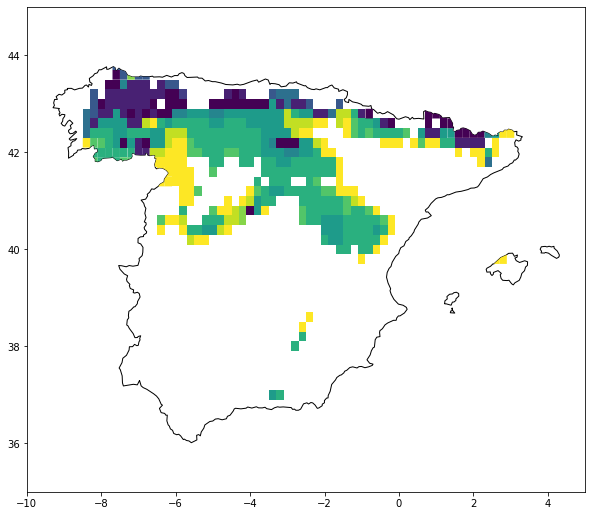

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
spain.plot(ax=ax, color='w', edgecolor='k')
gdf_zone.plot(ax=ax, column='A2')
ax.set_ylim([35,45]);
ax.set_xlim([-10,5]);

In [59]:
gdf_zone

,grid_id,DENOMINACI,LONG,LAT,geometry,N1971_2000_class,N1971_2000,MEDIA_class,MEDIA,A1B_class,A1B,A2_class,A2,B1_class,B1
0,0,1,-5.6,36.0,"POLYGON ((-5.70000 36.10000, -5.50000 36.10000...",,NaN,,NaN,,NaN,,NaN,,NaN
1,1,2,-5.4,36.0,"POLYGON ((-5.50000 36.10000, -5.43392 36.10000...",,NaN,,NaN,,NaN,,NaN,,NaN
2,2,3,-6.0,36.2,"POLYGON ((-6.10000 36.30000, -5.90000 36.30000...",,NaN,,NaN,,NaN,,NaN,,NaN
3,3,4,-5.8,36.2,"POLYGON ((-5.90000 36.30000, -5.70000 36.30000...",,NaN,,NaN,,NaN,,NaN,,NaN
4,4,5,-5.6,36.2,"POLYGON ((-5.70000 36.30000, -5.50000 36.30000...",,NaN,,NaN,,NaN,,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1440,1441,-5.4,43.6,"POLYGON ((-5.50000 43.55172, -5.41514 43.55458...",,NaN,,NaN,,NaN,,NaN,,NaN
1436,1441,1442,-5.2,43.6,"POLYGON ((-5.30000 43.53111, -5.29208 43.53097...",,NaN,,NaN,,NaN,,NaN,,NaN
1437,1442,1443,-8.0,43.8,"POLYGON ((-7.90000 43.70000, -8.06628 43.70000...",,NaN,,NaN,,NaN,,NaN,,NaN
1438,1443,1444,-7.8,43.8,"POLYGON ((-7.90000 43.74831, -7.86014 43.76486...",,NaN,,NaN,,NaN,,NaN,,NaN


## Reorganice indicator tables

In [60]:
def reorder_index(df, indicator_name):
    n = len(df)
    df = df[['grid_id', 'baseline', 'rcp85', 'rcp45']]
    df = df.melt(id_vars = 'grid_id', var_name='scenario', value_name = "value")
    df['dataset'] = 'Cambio climático en el viñedo'
    df['indicator'] = indicator_name
    df['year'] = ['1971-2000']*n+['2021-2050']*n*2
    df['unit'] = ''
    df = df[['grid_id', 'dataset', 'indicator', 'scenario', 'value', 'year', 'unit']]
    return df

**Frescor Nocturno**

In [61]:
df_frescor = gdf_frescor[['grid_id', 'DENOMINACI', 'N1971_2000_clase', 'A2_clase', 'B1_clase']]
df_frescor.rename(columns={'N1971_2000_clase': 'baseline', 'A2_clase': 'rcp85', 'B1_clase': 'rcp45'}, inplace=True)
df_frescor.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,grid_id,DENOMINACI,baseline,rcp85,rcp45
0,0,1,Cálido,Cálido,Cálido
1,1,2,Cálido,Cálido,Cálido
2,2,3,Cálido,Cálido,Cálido
3,3,4,Cálido,Cálido,Cálido
4,4,5,Cálido,Cálido,Cálido


In [62]:
df_frescor = reorder_index(df_frescor, 'indice_frescor_nocturno')
df_frescor

,grid_id,dataset,indicator,scenario,value,year,unit
0,0,Cambio climático en el viñedo,indice_frescor_nocturno,baseline,Cálido,1971-2000,
1,1,Cambio climático en el viñedo,indice_frescor_nocturno,baseline,Cálido,1971-2000,
2,2,Cambio climático en el viñedo,indice_frescor_nocturno,baseline,Cálido,1971-2000,
3,3,Cambio climático en el viñedo,indice_frescor_nocturno,baseline,Cálido,1971-2000,
4,4,Cambio climático en el viñedo,indice_frescor_nocturno,baseline,Cálido,1971-2000,
...,...,...,...,...,...,...,...
4315,1440,Cambio climático en el viñedo,indice_frescor_nocturno,rcp45,Templado,2021-2050,
4316,1441,Cambio climático en el viñedo,indice_frescor_nocturno,rcp45,Templado,2021-2050,
4317,1442,Cambio climático en el viñedo,indice_frescor_nocturno,rcp45,Fresco,2021-2050,
4318,1443,Cambio climático en el viñedo,indice_frescor_nocturno,rcp45,Fresco,2021-2050,


**Huglin**

In [63]:
df_huglin = gdf_huglin[['grid_id', 'DENOMINACI', 'N1971_2000_clase', 'A2_clase', 'B1_clase']]
df_huglin.rename(columns={'N1971_2000_clase': 'baseline', 'A2_clase': 'rcp85', 'B1_clase': 'rcp45'}, inplace=True)
df_huglin.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,grid_id,DENOMINACI,baseline,rcp85,rcp45
0,0,1,Templado,Templado cálido,Templado cálido
1,1,2,Templado cálido,Templado cálido,Templado cálido
2,2,3,Templado cálido,Cálido,Cálido
3,3,4,Templado cálido,Cálido,Cálido
4,4,5,Templado cálido,Cálido,Templado cálido


In [64]:
df_huglin = reorder_index(df_huglin, 'indice_huglin')
df_huglin

,grid_id,dataset,indicator,scenario,value,year,unit
0,0,Cambio climático en el viñedo,indice_huglin,baseline,Templado,1971-2000,
1,1,Cambio climático en el viñedo,indice_huglin,baseline,Templado cálido,1971-2000,
2,2,Cambio climático en el viñedo,indice_huglin,baseline,Templado cálido,1971-2000,
3,3,Cambio climático en el viñedo,indice_huglin,baseline,Templado cálido,1971-2000,
4,4,Cambio climático en el viñedo,indice_huglin,baseline,Templado cálido,1971-2000,
...,...,...,...,...,...,...,...
4315,1440,Cambio climático en el viñedo,indice_huglin,rcp45,Fresco,2021-2050,
4316,1441,Cambio climático en el viñedo,indice_huglin,rcp45,Fresco,2021-2050,
4317,1442,Cambio climático en el viñedo,indice_huglin,rcp45,Muy Fresco,2021-2050,
4318,1443,Cambio climático en el viñedo,indice_huglin,rcp45,Fresco,2021-2050,


**Sequía**

In [65]:
df_is = gdf_is[['grid_id', 'DENOMINACI', 'N1971_2000_clase', 'A2_clase', 'B1_clase']]
df_is.rename(columns={'N1971_2000_clase': 'baseline', 'A2_clase': 'rcp85', 'B1_clase': 'rcp45'}, inplace=True)
df_is.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,grid_id,DENOMINACI,baseline,rcp85,rcp45
0,0,1.0,Moderadamente seco,Moderadamente seco,Moderadamente seco
1,1,2.0,Moderadamente seco,Moderadamente seco,Moderadamente seco
2,2,3.0,Moderadamente seco,Moderadamente seco,Moderadamente seco
3,3,4.0,Moderadamente seco,Moderadamente seco,Moderadamente seco
4,4,5.0,Sub húmedo,Moderadamente seco,Moderadamente seco


In [66]:
df_is = reorder_index(df_is, 'indice_sequia')
df_is

,grid_id,dataset,indicator,scenario,value,year,unit
0,0,Cambio climático en el viñedo,indice_sequia,baseline,Moderadamente seco,1971-2000,
1,1,Cambio climático en el viñedo,indice_sequia,baseline,Moderadamente seco,1971-2000,
2,2,Cambio climático en el viñedo,indice_sequia,baseline,Moderadamente seco,1971-2000,
3,3,Cambio climático en el viñedo,indice_sequia,baseline,Moderadamente seco,1971-2000,
4,4,Cambio climático en el viñedo,indice_sequia,baseline,Sub húmedo,1971-2000,
...,...,...,...,...,...,...,...
4315,1440,Cambio climático en el viñedo,indice_sequia,rcp45,Húmedo,2021-2050,
4316,1441,Cambio climático en el viñedo,indice_sequia,rcp45,Húmedo,2021-2050,
4317,1442,Cambio climático en el viñedo,indice_sequia,rcp45,Húmedo,2021-2050,
4318,1443,Cambio climático en el viñedo,indice_sequia,rcp45,Húmedo,2021-2050,


**Mapa de zonificación**

In [67]:
# Drop NANs
gdf_zone.dropna(subset=['N1971_2000', 'MEDIA', 'A1B', 'A2', 'B1'],  how='all', inplace=True)
gdf_zone.drop(columns=['MEDIA', 'A1B', 'MEDIA_class', 'A1B_class'], inplace=True)
gdf_zone.rename(columns={'A2': 'rcp85', 'B1': 'rcp45', 'A2_class': 'rcp85_class', 'B1_class': 'rcp45_class'}, inplace=True)
gdf_zone.head()

,grid_id,DENOMINACI,LONG,LAT,geometry,N1971_2000_class,N1971_2000,rcp85_class,rcp85,rcp45_class,rcp45
62,62,63,-3.8,37.0,"POLYGON ((-3.90000 37.10000, -3.70000 37.10000...","DI+1, CI+1, HI+1",12.0,,NaN,,NaN
63,63,64,-3.6,37.0,"POLYGON ((-3.70000 37.10000, -3.50000 37.10000...","DI+1, CI+1, HI+1",12.0,,NaN,,NaN
64,64,65,-3.4,37.0,"POLYGON ((-3.50000 37.10000, -3.30000 37.10000...","DI+1, CI+2, HI-3",6.0,"DI+1, CI+2, HI-2",7.0,"DI+1, CI+2, HI-3",6.0
65,65,66,-3.2,37.0,"POLYGON ((-3.30000 37.10000, -3.10000 37.10000...","DI+1, CI+2, HI-3",6.0,"DI+1, CI+2, HI-1",8.0,"DI+1, CI+2, HI-2",7.0
66,66,67,-3.0,37.0,"POLYGON ((-3.10000 37.10000, -2.90000 37.10000...","DI+1, CI+1, HI-1",11.0,,NaN,"DI+1, CI+1, HI-1",11.0


Compute zonas optimas

<AxesSubplot:>

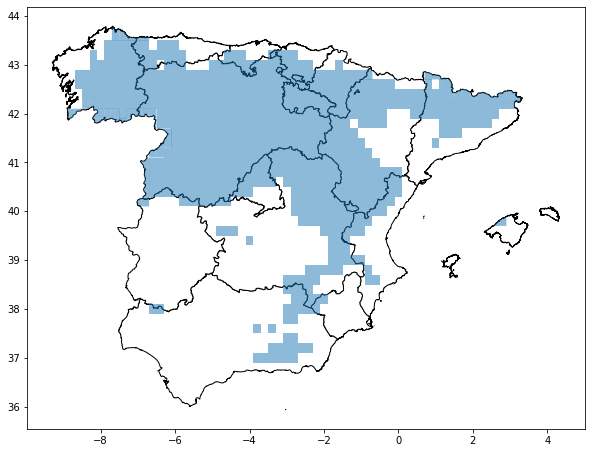

In [76]:
fig, ax = plt.subplots(figsize=(10,10))
comunidades.plot(ax=ax, color='w', edgecolor='k')
gdf_zone.plot(ax=ax, alpha=0.5)

In [79]:
gdf_zone_CM = gdf_zone.overlay(gpd.GeoDataFrame({'geometry':comunidades[comunidades['DS_CCAA'] == 'Castilla La Mancha'].simplify(0.00005)}), how='intersection')

<AxesSubplot:>

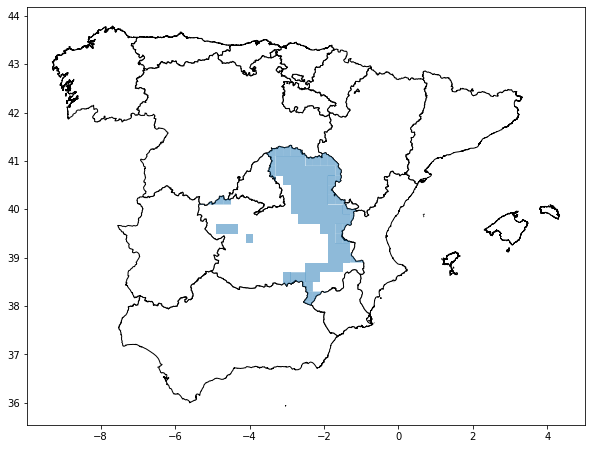

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
comunidades.plot(ax=ax, color='w', edgecolor='k')
gdf_zone_CM.plot(ax=ax, alpha=0.5)

In [81]:
area_zones = gdf_zone_CM.copy()
area_zones= area_zones.to_crs({'init': 'epsg:3857'})
area_zones["area"] = area_zones['geometry'].area/ 10**6
area_zones.head(2)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,grid_id,DENOMINACI,LONG,LAT,N1971_2000_class,N1971_2000,rcp85_class,rcp85,rcp45_class,rcp45,geometry,area
0,224,225,-2.6,38.0,"DI+1, CI+2, HI-2",7.0,,NaN,"DI+1, CI+2, HI-1",8.0,"POLYGON ((-278298.727 4593562.107, -278298.727...",19.907453
1,225,226,-2.4,38.0,"DI+1, CI+2, HI+1",9.0,,NaN,,NaN,"POLYGON ((-256034.829 4593562.107, -256034.829...",172.367289


In [82]:
area_baseline = area_zones[['geometry', 'N1971_2000', 'area']].dropna()['area'].sum()
area_rcp45 = area_zones[['geometry', 'rcp45', 'area']].dropna()['area'].sum()
area_rcp85 =  area_zones[['geometry', 'rcp85', 'area']].dropna()['area'].sum()

print((area_rcp45-area_baseline)/area_baseline*100 )
print((area_rcp85-area_baseline)/area_baseline*100 )


-51.094446471448684
-67.72425905654117


Reorganice data

In [68]:
df_zone = gdf_zone[['grid_id', 'DENOMINACI', 'N1971_2000_class','N1971_2000', 'rcp85_class', 'rcp85', 'rcp45_class', 'rcp45']]
df_zone.rename(columns={'N1971_2000_class': 'baseline_class', 'N1971_2000': 'baseline'}, inplace=True)
df_zone.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,grid_id,DENOMINACI,baseline_class,baseline,rcp85_class,rcp85,rcp45_class,rcp45
62,62,63,"DI+1, CI+1, HI+1",12.0,,NaN,,NaN
63,63,64,"DI+1, CI+1, HI+1",12.0,,NaN,,NaN
64,64,65,"DI+1, CI+2, HI-3",6.0,"DI+1, CI+2, HI-2",7.0,"DI+1, CI+2, HI-3",6.0
65,65,66,"DI+1, CI+2, HI-3",6.0,"DI+1, CI+2, HI-1",8.0,"DI+1, CI+2, HI-2",7.0
66,66,67,"DI+1, CI+1, HI-1",11.0,,NaN,"DI+1, CI+1, HI-1",11.0


In [69]:
df_zone_value = df_zone[['grid_id', 'baseline', 'rcp85', 'rcp45']]
df_zone_value = df_zone_value.melt(id_vars = 'grid_id', var_name='scenario', value_name = "value")
df_zone_class = df_zone[['grid_id', 'baseline_class', 'rcp85_class', 'rcp45_class']]
df_zone_class.rename(columns={'baseline_class': 'baseline', 'rcp85_class': 'rcp85', 'rcp45_class': 'rcp45'}, inplace=True)
df_zone_class = df_zone_class.melt(id_vars = 'grid_id', var_name='scenario', value_name = "class")
df_zone_new = pd.merge(df_zone_value, df_zone_class.drop(columns=['grid_id', 'scenario']), how ='left', left_index=True, right_index=True)
df_zone_new['dataset'] = 'Cambio climático en el viñedo'
df_zone_new['indicator'] = 'zonas_alto_potencial_climático'
df_zone_new['year'] = ['1971-2000']*len(df_zone)+['2021-2050']*len(df_zone)*2
df_zone_new['unit'] = ''
df_zone_new = df_zone_new[['grid_id', 'dataset', 'indicator', 'scenario', 'value', 'class', 'year', 'unit']]
df_zone_new.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,grid_id,dataset,indicator,scenario,value,class,year,unit
0,62,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,12.0,"DI+1, CI+1, HI+1",1971-2000,
1,63,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,12.0,"DI+1, CI+1, HI+1",1971-2000,
2,64,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,6.0,"DI+1, CI+2, HI-3",1971-2000,
3,65,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,6.0,"DI+1, CI+2, HI-3",1971-2000,
4,66,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,11.0,"DI+1, CI+1, HI-1",1971-2000,


**Save tables**

In [364]:
df_zone_new.to_csv(f'../../datasets/processed/vineyard_indicators/vineyard_indicators_rejilla.csv', index = False)

**Mascara de zonificación**

In [70]:
df_zone_new = df_zone_new.dropna()
df_zone_mask = df_zone_new[['grid_id', 'scenario', 'year']]
df_zone_mask['value'] = 1
df_zone_mask = pd.merge(df_is[['grid_id', 'scenario', 'year']], df_zone_mask, how='left', on=['grid_id', 'scenario', 'year']).fillna(0)
df_zone_mask['dataset'] = df_zone_new['dataset'].iloc[0]
df_zone_mask['indicator'] = df_zone_new['indicator'].iloc[0]
df_zone_mask['unit'] = df_zone_new['unit'].iloc[0]
df_zone_mask = df_zone_mask[list(df_is.columns)]

df_zone_mask

/tmp/ipykernel_109/3769351925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone_mask['value'] = 1


,grid_id,dataset,indicator,scenario,value,year,unit
0,0,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,0.0,1971-2000,
1,1,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,0.0,1971-2000,
2,2,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,0.0,1971-2000,
3,3,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,0.0,1971-2000,
4,4,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,0.0,1971-2000,
...,...,...,...,...,...,...,...
4315,1440,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,0.0,2021-2050,
4316,1441,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,0.0,2021-2050,
4317,1442,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,0.0,2021-2050,
4318,1443,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,0.0,2021-2050,


**Get data in zonas optimas**

In [83]:
df_frescor_new = pd.merge(df_frescor, df_zone_mask[['grid_id', 'scenario', 'value']].rename(columns={'value': 'mask'}), how='left', on=['grid_id', 'scenario'])
df_frescor_new = df_frescor_new[df_frescor_new['mask'] == 1.].drop(columns='mask')

df_huglin_new = pd.merge(df_huglin, df_zone_mask[['grid_id', 'scenario', 'value']].rename(columns={'value': 'mask'}), how='left', on=['grid_id', 'scenario'])
df_huglin_new = df_huglin_new[df_huglin_new['mask'] == 1.].drop(columns='mask')

df_is_new = pd.merge(df_is, df_zone_mask[['grid_id', 'scenario', 'value']].rename(columns={'value': 'mask'}), how='left', on=['grid_id', 'scenario'])
df_is_new = df_is_new[df_is_new['mask'] == 1.].drop(columns='mask')

df_zone_mask_new = df_zone_mask[df_zone_mask['value'] == 1.]

In [87]:
df_zone_mask_new

,grid_id,dataset,indicator,scenario,value,year,unit
62,62,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,1.0,1971-2000,
63,63,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,1.0,1971-2000,
64,64,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,1.0,1971-2000,
65,65,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,1.0,1971-2000,
66,66,Cambio climático en el viñedo,zonas_alto_potencial_climático,baseline,1.0,1971-2000,
...,...,...,...,...,...,...,...
4304,1429,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,1.0,2021-2050,
4305,1430,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,1.0,2021-2050,
4306,1431,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,1.0,2021-2050,
4307,1432,Cambio climático en el viñedo,zonas_alto_potencial_climático,rcp45,1.0,2021-2050,


**Save tables**

In [86]:
pd.concat([df_frescor_new, df_huglin_new, df_is_new, df_zone_mask_new]).reset_index(drop=True).to_csv(f'../../datasets/processed/vineyard_indicators/vineyard_indicators_rejilla.csv', index = False)

In [261]:
pd.concat([df_frescor, df_huglin, df_is, df_zone_mask]).reset_index(drop=True).to_csv(f'../../datasets/processed/vineyard_indicators/vineyard_indicators_rejilla.csv', index = False)

## Olas de calor

In [3]:
indicator = 'HWD_EU_climate'
scenario = 'rcp85'
year = '2065 - 2095'

**Municipios de España**

In [7]:
municipios = gpd.read_file(f'../../datasets/raw/georegions/Municipios/Municipios_IGN.shp')
municipios.sort_values(['CODNUT1', 'CODNUT2', 'CODNUT3', 'CODIGOINE'], inplace = True)

# Remove Canarias, Ceuta, and Melilla
municipios = municipios[~municipios['CODNUT2'].isin(['ES70', 'ES63', 'ES64'])]
municipios = municipios.reset_index(drop=True)

In [9]:
df = pd.read_csv('../../datasets/processed/climate_indicators_municipios.csv')
df = df.astype({'CODIGOINE':int})
gdf = df[(df['indicator'] == indicator) & (df['scenario'] == scenario) & (df['year'] == year)]
gdf = gpd.GeoDataFrame(pd.merge(gdf, municipios[['CODIGOINE', 'geometry']].astype({'CODIGOINE':int}), how='left', on='CODIGOINE'))
unit = gdf['unit'].iloc[0]
gdf.head()

,CODIGOINE,dataset,indicator,scenario,value,year,unit,geometry
0,15001,Temperature statistics and heat waves,HWD_EU_climate,rcp85,7.257026,2065 - 2095,days,"POLYGON ((-8.35892 43.14721, -8.35864 43.14764..."
1,15002,Temperature statistics and heat waves,HWD_EU_climate,rcp85,9.539589,2065 - 2095,days,"POLYGON ((-8.72471 42.88868, -8.72403 42.88872..."
2,15003,Temperature statistics and heat waves,HWD_EU_climate,rcp85,8.800063,2065 - 2095,days,"POLYGON ((-8.11605 43.21256, -8.11120 43.21299..."
3,15004,Temperature statistics and heat waves,HWD_EU_climate,rcp85,7.227327,2065 - 2095,days,"MULTIPOLYGON (((-8.26941 43.42891, -8.26951 43..."
4,15005,Temperature statistics and heat waves,HWD_EU_climate,rcp85,4.014762,2065 - 2095,days,"MULTIPOLYGON (((-8.55475 43.31382, -8.55483 43..."


Text(0.5, 1.0, 'time = 2065 - 2095, scenario = rcp85')

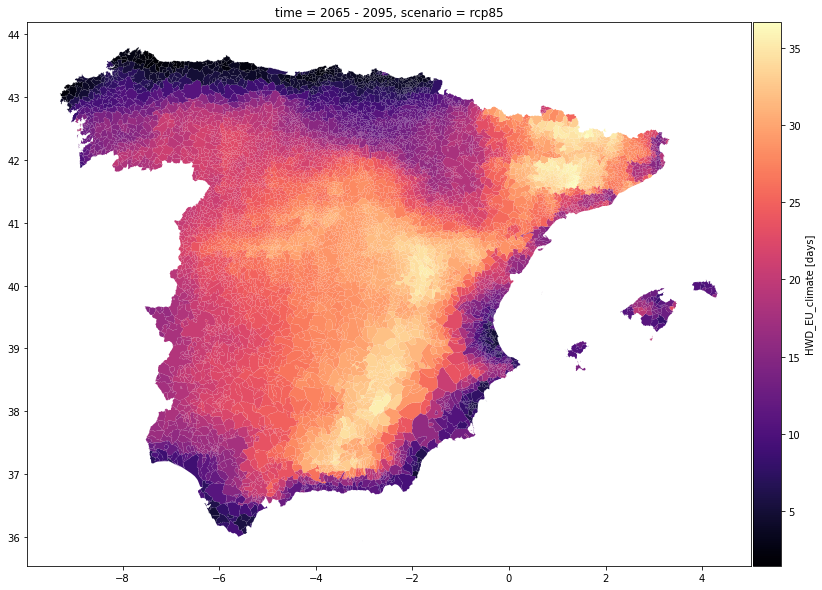

In [10]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=-1.5) 
gdf.plot(ax=ax, column='value', cmap='magma', legend=True, cax=cax, legend_kwds={'label': f'{indicator} [{unit}]'})
ax.set_title(f'time = {year}, scenario = {scenario}')